**Аналитическая записка по проекту "ТОС"**

_____
**Цель исследования.**
    Провести обработку, исследование и визуализацию характеристик ТОСов Белгородского района, а так же их председателей и активности.
   
_____
**Задачи исследования.**

Создать дашборд с основной информацией о состоянии ТОСов, их председателях и участия в различных конкурсах.
Проверить гипотезу что активность тоса зависит от размера поселения и возраста председателя.
_____
**Исходные данные.**
    
Путь к файлу: https://disk.yandex.ru/i/WnRPrFRe4305XQ
  
 
***Часть 1. Обработка и загрузка данных:***
* [1. Загрузка данных ](#1-bullet)


***Часть 2. Исследовательский анализ данных:***
* [1. Расчет ключевых показателей метрик.](#2-bullet)
* [2. Гистограммы распределения метрик.](#3-bullet)
* [3. Корреляционнный анализ метрик.](#4-bullet)

***Часть 3. Проверка гипотез:***
* [1. Гипотеза различия размера поселения для активных и неактивных ТОС.](#5-bullet)
* [2. Гипотеза различия возраста председателя между активными и неактивными ТОС.](#6-bullet)

***[Выводы.](#7-bullet)***

***[Дашбоард.](#8-bullet)***

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from statistics import variance 
import math as mth


#### Часть 1. Обработка и загрузка данных

** Предобработка данных **

Предобработку данных осуществила непосредственно в ексель
* Проверила дубли и пустые значения - они отсутствуют
* Проверила форматы столбцов и привела их в соответствие - даты в формат дат, убрала лишние пробелы
* В столбце с суммой финансирования по конкурсам убрала рубли и лишние пробелы и посчитала общую сумму финансирования ко конкурсу
* Добавила два столбца – возраст председателя ТОС(на момент выбора ) и стаж работы председателем (=(ГОД(ТДАТА())-ГОД(K199)), =(ГОД(K199)-ГОД(O199)))
* Исправила аномальные данные – возраст председателя стр 143
* Добавила столбцы с балами активности ( Активные ТОС +1 балл, за каждый конкурс +1 балл, за наличие соцсети +1 балл). Получился индикатор активности в баллах от 0 до 5. Далее буду считать 0-1 это неактивные ТОС, при 2 и более это активные ТОС.
* Далее создала доп лист для проверки гипотез (для упрощения работы с данными)
  
    'id' - № пп,
  'location' - поселение, 
  'population'- население, 
  'community'- населенный пункт , 
  'name' – название ТОС, 
    'residents' – количество жителей, зарегистрированных на территорииТОС, 
    'members' – количество членов ТОС, 
    'active_members' – количество активных членов ТОС, 
    'gender' – пол председателя ТОС, 
    'experience' – стаж председателя ТОС, 
    'type_work' – тип занятости председателя, 
    'age' – возраст председателя, 
    'active' – активный или неактивный ТОС,  
    'type_activity' – направление деятельности тоса, 
    'indicator' – индикатор активности

<a id = '1-bullet'></a>
##### Загрузка данных.

In [2]:
#нужно указать путь к файлу
file_name = 'C:/Users/Natalia/Desktop/Белгородский район ТЗ Яндекс Мастерская_Каширцева.xlsx'

In [3]:
#выгрузим ексель файл с данными ТОС в датафрейм
names=['id', 'location', 'population', 'community', 'name', 'residents', 'members', 'active_members', 'gender', 'experience', 
           'type_work', 'age', 'active',  'type_activity', 'indicator']
tos = pd.read_excel(file_name, sheet_name='ТОС_анализ', names=names)
print(tos.info())
tos.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              199 non-null    int64 
 1   location        199 non-null    object
 2   population      199 non-null    int64 
 3   community       199 non-null    object
 4   name            199 non-null    object
 5   residents       199 non-null    int64 
 6   members         199 non-null    int64 
 7   active_members  199 non-null    int64 
 8   gender          199 non-null    object
 9   experience      199 non-null    int64 
 10  type_work       199 non-null    object
 11  age             199 non-null    int64 
 12  active          199 non-null    object
 13  type_activity   199 non-null    object
 14  indicator       199 non-null    int64 
dtypes: int64(8), object(7)
memory usage: 23.4+ KB
None


,id,location,population,community,name,residents,members,active_members,gender,experience,type_work,age,active,type_activity,indicator
0,1,Октябрьский,8471,"Городское поселение ""Поселок Октябрьский""",«Питомник»,1433,25,4,муж,7,Безработный,55,Активный,Благоустройство,3
1,2,Октябрьский,8471,"Городское поселение ""Поселок Октябрьский""",«Олимп»,563,19,7,жен,3,Безработный,35,Активный,Благоустройство,3
2,3,Октябрьский,8471,"Городское поселение ""Поселок Октябрьский""",«Заречный»,271,16,2,жен,5,Домохозяйка,35,Активный,Благоустройство,3
3,4,Октябрьский,8471,"Городское поселение ""Поселок Октябрьский""",«Центральный»,231,35,2,жен,3,Руководитель бизнес,42,неактивный,Благоустройство,3
4,5,Октябрьский,8471,"Городское поселение ""Поселок Октябрьский""",«Юность»,148,15,2,муж,3,Мобилизованный,38,неактивный,Благоустройство,1


In [4]:
# считаем что неактивный ТОС с индикатором 0,1, если 2 и выше, то это уже активный ТОС
def categorize_active(p):
    try:
        if p < 2:
            return 'неактивный'
        else:
            return 'активный'
    except:
        pass

In [5]:
# добавим столбец с категориями
tos['active_new'] = tos['indicator'].apply(categorize_active)

In [6]:
# посчитаем вовлеченность членов ТОС 
tos['act_members_per'] = tos['active_members']/tos['members']

In [7]:
tos.sample(5)

,id,location,population,community,name,residents,members,active_members,gender,experience,type_work,age,active,type_activity,indicator,active_new,act_members_per
97,98,Дубовское с/п,17952,Дубовское сельское поселение\nп. Дубовое,Ново-Дубовской,300,19,19,муж,2,Найм бизнес,39,активный,"благоустройство, культура и сохранение традиций",2,активный,1.000000
62,63,Беловское с/п,6058,Беловское сельское поселение\nс. Севрюково,«Васильковый»,520,150,10,муж,5,ИП,26,активный,Благоустройство,2,активный,0.066667
151,152,Новосадовское с/п,12741,Новосадовское сельское поселение\nп. Новосадовый,"ТОС ""Березки-4""",98,98,26,муж,2,ИП,35,активный,Благоустройство,1,неактивный,0.265306
92,93,Головинское с/п,2362,Головинское сельское поселение с. Головино,"""Григорьевский""",331,24,5,муж,7,Найм в бюджетной организации,37,активный,"благоустройство, физкультура, работа с молодежью",3,активный,0.208333
16,17,Разумное,30517,"Городское поселение ""Поселок Разумное""",Подснежник,120,120,2,жен,7,Безработный,40,неактивный,Благоустройство,0,неактивный,0.016667


#### Часть 2. Исследовательский анализ данных

<a id = '2-bullet'></a>
##### Расчет ключевых показателей метрик.

In [8]:
tos.describe()

,id,population,residents,members,active_members,experience,age,indicator,act_members_per
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,100.000000,12887.010050,329.226131,127.608040,9.814070,4.909548,43.869347,2.045226,0.232255
std,57.590508,10463.669313,979.425566,177.414646,10.609725,2.576479,12.931951,1.021469,0.303112
min,1.000000,1034.000000,20.000000,4.000000,0.000000,1.000000,19.000000,0.000000,0.000000
25%,50.500000,4634.500000,106.000000,25.000000,3.000000,3.000000,34.000000,1.000000,0.040000
50%,100.000000,8471.000000,167.000000,56.000000,5.000000,5.000000,39.000000,2.000000,0.100000
75%,149.500000,21015.500000,314.500000,150.000000,13.000000,6.000000,54.000000,3.000000,0.250000
max,199.000000,30517.000000,13587.000000,1120.000000,63.000000,14.000000,75.000000,5.000000,1.000000


In [9]:
# посмотрим показатели для активных ТОС
tos.loc[ tos['active_new']=='активный'].describe()

,id,population,residents,members,active_members,experience,age,indicator,act_members_per
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,112.904412,9397.492647,281.610294,115.088235,11.375000,5.220588,43.617647,2.602941,0.262210
std,52.765572,7846.035147,279.977517,175.447047,11.855886,2.484593,12.018541,0.691530,0.305989
min,1.000000,1034.000000,27.000000,4.000000,0.000000,1.000000,22.000000,2.000000,0.000000
25%,71.750000,3384.000000,109.750000,22.000000,3.000000,3.000000,35.000000,2.000000,0.062307
50%,112.500000,6092.000000,194.500000,52.000000,6.500000,5.000000,39.000000,2.000000,0.134848
75%,158.500000,12741.000000,328.000000,128.500000,15.000000,6.000000,53.250000,3.000000,0.272321
max,199.000000,30517.000000,1640.000000,1120.000000,63.000000,14.000000,74.000000,5.000000,1.000000


In [10]:
# посмотрим показатели для неактивных ТОС
tos.loc[ tos['active_new']=='неактивный'].describe()

,id,population,residents,members,active_members,experience,age,indicator,act_members_per
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,72.142857,20419.936508,432.015873,154.634921,6.444444,4.238095,44.412698,0.841270,0.167591
std,58.101096,11456.152676,1696.200921,180.025921,6.044933,2.662247,14.802610,0.368359,0.288661
min,5.000000,1757.000000,20.000000,10.000000,0.000000,1.000000,19.000000,0.000000,0.000000
25%,24.500000,7421.000000,100.500000,34.500000,2.000000,2.000000,32.500000,1.000000,0.016530
50%,44.000000,30517.000000,150.000000,102.000000,4.000000,3.000000,40.000000,1.000000,0.041667
75%,127.000000,30517.000000,285.000000,230.000000,9.000000,6.000000,56.500000,1.000000,0.126667
max,185.000000,30517.000000,13587.000000,935.000000,26.000000,14.000000,75.000000,1.000000,1.000000


Если смотреть по средним показателям то для активных ТОСов выходит размер поселений, количество членов меньше чем у неактивных. Средний возраст председателя незначительно отличается. Средний процент вовлеченности членов ТОС для активных составляет 26%, для неактивных почти 17%.

<a id = '3-bullet'></a>
##### Гистограммы распределения метрик.

Рассмотрим распределение ТОС по различным населению, количеству жителей на территории ТОС, количеству членов, активистов и стажу и возрасту председателя в разрезе активных и неактивных ТОС.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


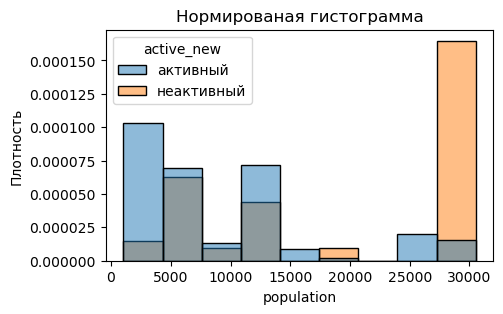

In [11]:
plt.figure(figsize=(5, 3))
sns.histplot(x='population', data=tos, hue='active_new', common_norm=False, stat='density')
plt.title('Нормированая гистограмма')
plt.ylabel('Плотность')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


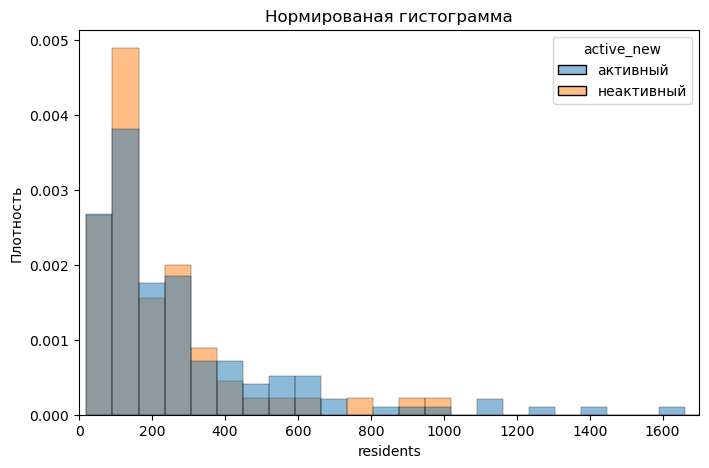

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(x='residents', data=tos, hue='active_new', common_norm=False, stat='density')
plt.xlim(0.0, 1700)
plt.title('Нормированая гистограмма')
plt.ylabel('Плотность')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


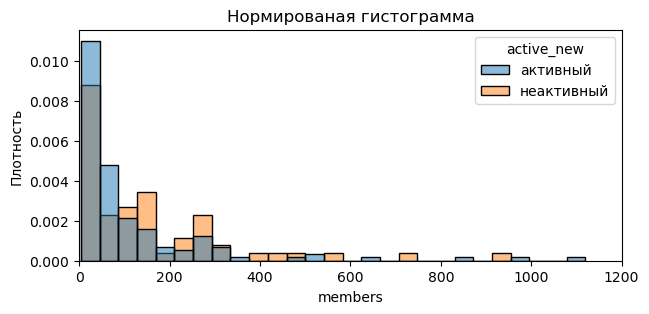

In [13]:
plt.figure(figsize=(7, 3))
sns.histplot(x='members', data=tos, hue='active_new', common_norm=False, stat='density')
plt.xlim(0.0, 1200)
plt.title('Нормированая гистограмма')
plt.ylabel('Плотность')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


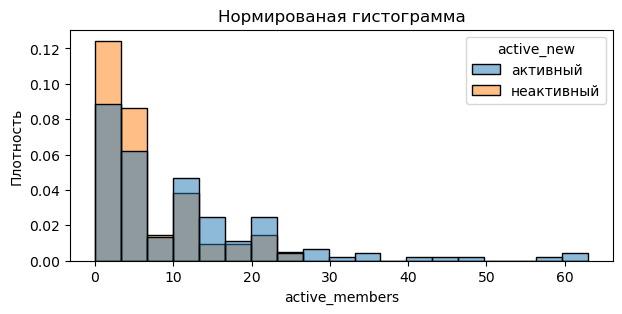

In [14]:
plt.figure(figsize=(7, 3))
sns.histplot(x='active_members', data=tos, hue='active_new', common_norm=False, stat='density')
plt.title('Нормированая гистограмма')
plt.ylabel('Плотность')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


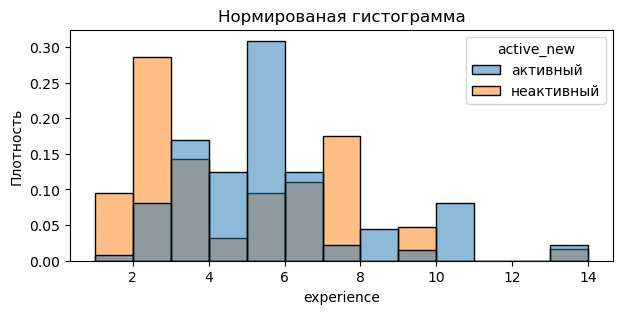

In [15]:
plt.figure(figsize=(7, 3))
sns.histplot(x='experience', data=tos, hue='active_new', common_norm=False, stat='density')
plt.title('Нормированая гистограмма')
plt.ylabel('Плотность')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


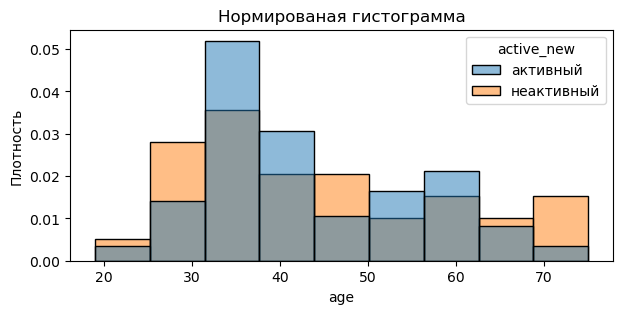

In [16]:
plt.figure(figsize=(7, 3))
sns.histplot(x='age', data=tos, hue='active_new', common_norm=False, stat='density')
plt.title('Нормированая гистограмма')
plt.ylabel('Плотность')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


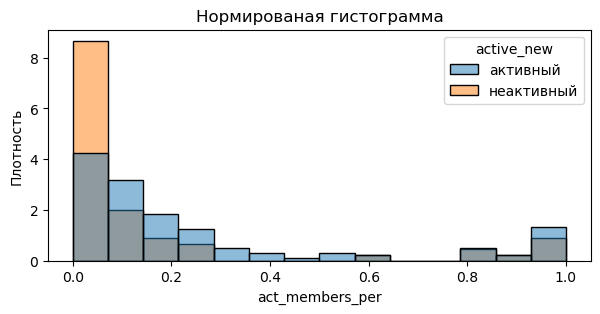

In [17]:
plt.figure(figsize=(7, 3))
sns.histplot(x='act_members_per', data=tos, hue='active_new', common_norm=False, stat='density')
plt.title('Нормированая гистограмма')
plt.ylabel('Плотность')
plt.show()

По гистограммам можно сделать вывод что для неактивных ТОС больше характерно большее количество жителей и членов ТОС, при этом меньшее количество активных членов, а так же чаще неактивные ТОС имеют председателя с меньшим стажем и по возрасту либо моложе 30 либо старше 60. Для неактивных ТОС процент вовлеченности участников значительно ниже чем у активных.

<a id = '4-bullet'></a>
##### Корреляционный анализ.

In [18]:
#  матрица корреляции
data = tos[['id', 'population', 'residents', 'members', 'active_members', 'experience', 
           'age', 'indicator', 'act_members_per']]
data_corr = data.corr()
data_corr

,id,population,residents,members,active_members,experience,age,indicator,act_members_per
id,1.000000,-0.569035,0.031967,0.048247,0.343374,-0.000034,0.050155,0.351657,0.139090
population,-0.569035,1.000000,0.015022,0.322046,-0.196068,-0.072636,0.039363,-0.502366,-0.361932
residents,0.031967,0.015022,1.000000,0.081477,0.044848,0.075982,-0.054471,-0.016927,0.158939
members,0.048247,0.322046,0.081477,1.000000,0.226685,0.019788,0.042174,-0.092371,-0.370490
active_members,0.343374,-0.196068,0.044848,0.226685,1.000000,-0.008009,-0.094559,0.088392,0.339831
experience,-0.000034,-0.072636,0.075982,0.019788,-0.008009,1.000000,0.119999,0.226089,-0.044382
age,0.050155,0.039363,-0.054471,0.042174,-0.094559,0.119999,1.000000,-0.043137,-0.103385
indicator,0.351657,-0.502366,-0.016927,-0.092371,0.088392,0.226089,-0.043137,1.000000,0.103060
act_members_per,0.139090,-0.361932,0.158939,-0.370490,0.339831,-0.044382,-0.103385,0.103060,1.000000


Text(0.5, 1.0, 'Корреляция индикатора активности')

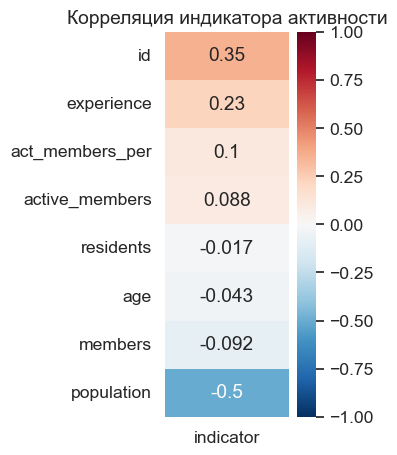

In [19]:
# построим столбец корреляции для индикатора активности
sns.set(font_scale=1.15)
plt.figure(figsize=(2,5))
sns.heatmap(data_corr[['indicator']].sort_values(by='indicator', ascending=False).drop('indicator'),  
            cmap='RdBu_r', 
            annot=True, 
            vmin=-1, vmax=1)
plt.title('Корреляция индикатора активности')

Самая большая корреляция с населением, причем обратная, и стажем руководителя, а самая низкая корреляция с количеством жителей, зарегистрированных на территории ТОСа

#### Часть 3. Проверка статестических гипотез.

Проверим две гипотезы чем больше размер поселения тем активнее ТОС. В качесте меры поселения возьмем население этого поселения. И вторую гипотезу -  чем моложе председатель тем активнее ТОС.

<a id = '5-bullet'></a>
##### Гипотеза различия размера поселения для активных и неактивных ТОС

    Нулевая гипотеза: средний размер населенного пункта, для активных ТОС равен среднему размеру населенного пункта для неактивных ТОС. 
    Альтернативная гипотеза: средний размер населенного пункта, для активных ТОС больше среднемего размера населенного пункта для неактивных ТОС.

In [20]:
#разобьем датафрейм на две части по активности ТОС
data_0 = tos.query('active_new=="неактивный"')
data_1 = tos.query('active_new=="активный"')

In [21]:
print('Среднее население для неактивных ТОС ', data_0['population'].mean())
print('Среднее население для активных ТОС', data_1['population'].mean())

Среднее население для неактивных ТОС  20419.93650793651
Среднее население для активных ТОС 9397.492647058823


t-тест, можно применять, если:
* Генеральные совокупности не зависят друг от друга. В нашем случае у нас две выборки из одного датафрейма с разным количеством используемых продуктов.
* Выборочные средние нормально распределены. Если размер выборки составляет хотя бы несколько десятков значений, то выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены близко к нормальному вокруг истинного среднего этой совокупности. Это так, даже если сама генеральная совокупность не распределена нормально.
* Дисперсии рассматриваемых генеральных совокупностей равны. Если это не так, то можно использовать параметр equal_var = False.

В нашем случае две выборки с активными и неактивными ТОС независимы друг от друга, проверим распределение для выборочных средних и дисперсию

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

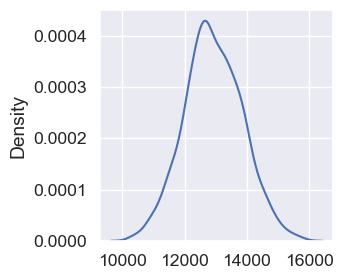

In [22]:
# проверим распределение выборочных средних по количеству населения
data = np.array(tos['population'])  # преобразуем в массив NumPy
rand_idx = np.random.randint(0, len(data), (1000, 130)) # Генерируем случайные индексы в пределах длины data
means = data[rand_idx].mean(axis=1)  # Извлекаем случайные данные и считаем среднее по каждой строке
plt.figure(figsize=(3, 3)) 
sns.kdeplot(means)

In [23]:
print('Дисперсия для неактивных', data_0['population'].var())
print('Дисперсия для активных', data_1['population'].var())

Дисперсия для неактивных 131243434.12493597
Дисперсия для активных 61560267.52587141


Дисперсии значительно различаются, добавим аргумент equal_var = False

In [24]:
alpha = 0.05

# проводим ttest для двух выборок
results = st.ttest_ind(data_1['population'], data_0['population'], equal_var = False, alternative='greater')
print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.9999999996806805
Нет оснований отвергнуть нулевую гипотезу


Делаем вывод, что статистически нельзя подтвердить что у активных ТОС размер поселения больше чем у неактивных.

<a id = '6-bullet'></a>
##### Гипотеза различия возраста председателя для активных и неактивных ТОС

    Нулевая гипотеза: средний возраст председателя, для активных ТОС равен среднему возрасту председателей для неактивных ТОС. 
    Альтернативная гипотеза: средний возраст председателя, для активных ТОС меньше средненего возраста председателя для неактивных ТОС.

In [25]:
print('Среднее население для неактивных ТОС ', data_0['age'].mean())
print('Среднее население для активных ТОС', data_1['age'].mean())

Среднее население для неактивных ТОС  44.41269841269841
Среднее население для активных ТОС 43.61764705882353


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

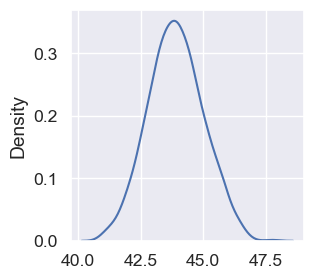

In [26]:
# проверим распределение выборочных средних по возрасту
data = np.array(tos['age'])  # преобразуем в массив NumPy
rand_idx = np.random.randint(0, len(data), (1000, 130)) # Генерируем случайные индексы в пределах длины data
means = data[rand_idx].mean(axis=1)  # Извлекаем случайные данные и считаем среднее по каждой строке
plt.figure(figsize=(3, 3)) 
sns.kdeplot(means)

In [27]:
print('Дисперсия для неактивных', data_0['age'].var())
print('Дисперсия для активных', data_1['age'].var())

Дисперсия для неактивных 219.11725550435227
Дисперсия для активных 144.44531590413928


Дисперсии значительно различаются, добавим аргумент equal_var = False

In [28]:
alpha = 0.05

# проводим ttest для двух выборок
results = st.ttest_ind(data_1['age'], data_0['age'], equal_var = False, alternative='less')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.35491566030597355
Нет оснований отвергнуть нулевую гипотезу


Cтатистически нельзя подтвердить что у активных ТОС председатели моложе, чем у неактивных.

<a id = '7-bullet'></a>
#### Выводы

По средним показателям для активных ТОСов размер поселений, количество членов меньше чем у неактивных. Средний возраст председателя незначительно отличается. Средний процент вовлеченности членов ТОС для активных составляет 26%, для неактивных почти 17%.
По гистограммам можно сделать вывод что для неактивных ТОС характерно большее количество жителей и членов ТОС, при этом меньшее количество активных членов, а так же чаще неактивные ТОС имеют председателя с меньшим стажем и по возрасту либо моложе 30 либо старше 60. Для неактивных ТОС процент вовлеченности участников значительно ниже чем у активных.
Самая большая корреляция с населением, причем обратная, и стажем руководителя и вовлеченностью членов ТОС, а самая низкая корреляция с количеством жителей, зарегистрированных на территории ТОСа. 
Сформулировали проверили две гипотезы о том что чем активнее тос, тем на территории с большим населением он находится и тем иоложе председатель ТОС. Обе гипотезы статистически не подтвердились.
Таким образом, получается что для активных ТОС скорее характерно меньшее количество членов с большим количеством активистов. При этом председатель среднего возраста с достаточным тосовским опытом.

<a id = '8-bullet'></a>
#### Дашборд

<https://datalens.yandex/q05z0c8m3f9yd>